# Internsip Project : Iris Flower Clasification

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:

df = pd.read_csv('Iris.csv')
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Check dataset information
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [6]:
# Check for duplicates
print(f"\nDuplicates found: {df.duplicated().sum()}")

# Drop the 'Id' column as it is not needed for prediction
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)
    print("\n'Id' column dropped.")

# Verify the data after cleaning
display(df.head())


Duplicates found: 3


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Set the style for plots
sns.set(style="whitegrid")

# 1. Summary Statistics
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Figure size 1000x800 with 0 Axes>

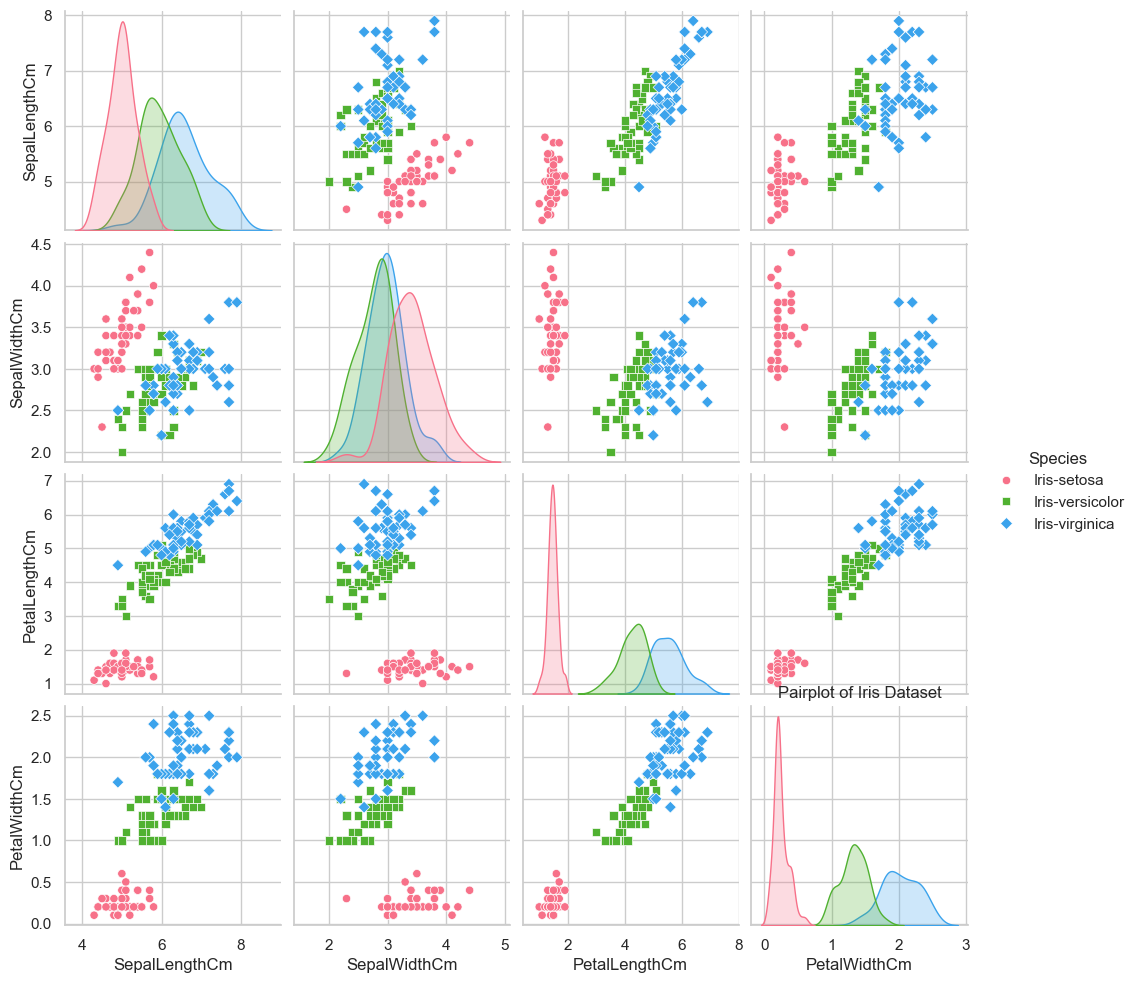

In [8]:
# 2. Pairplot to visualize relationships between features
plt.figure(figsize=(10, 8))
sns.pairplot(df, hue='Species', markers=["o", "s", "D"], palette='husl')
plt.title("Pairplot of Iris Dataset")
plt.show()

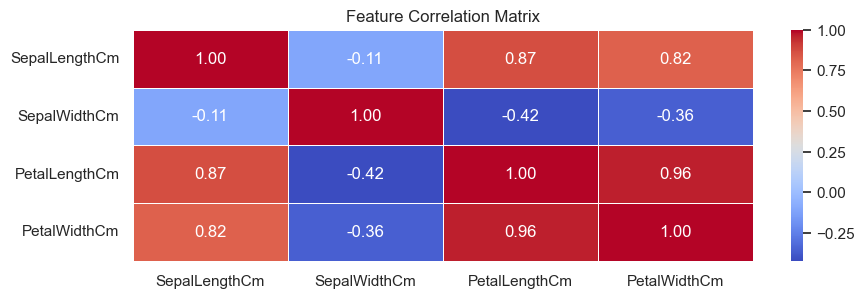

In [12]:
# 3. Correlation Matrix Heatmap
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 3))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

C:\Users\Ghulam Mustafa\AppData\Local\Temp\ipykernel_21244\3024597754.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=column, data=df, palette='husl')
C:\Users\Ghulam Mustafa\AppData\Local\Temp\ipykernel_21244\3024597754.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=column, data=df, palette='husl')
C:\Users\Ghulam Mustafa\AppData\Local\Temp\ipykernel_21244\3024597754.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=column, data=df, palette='husl')
C:\Users\Ghulam Mustafa\AppData\Local

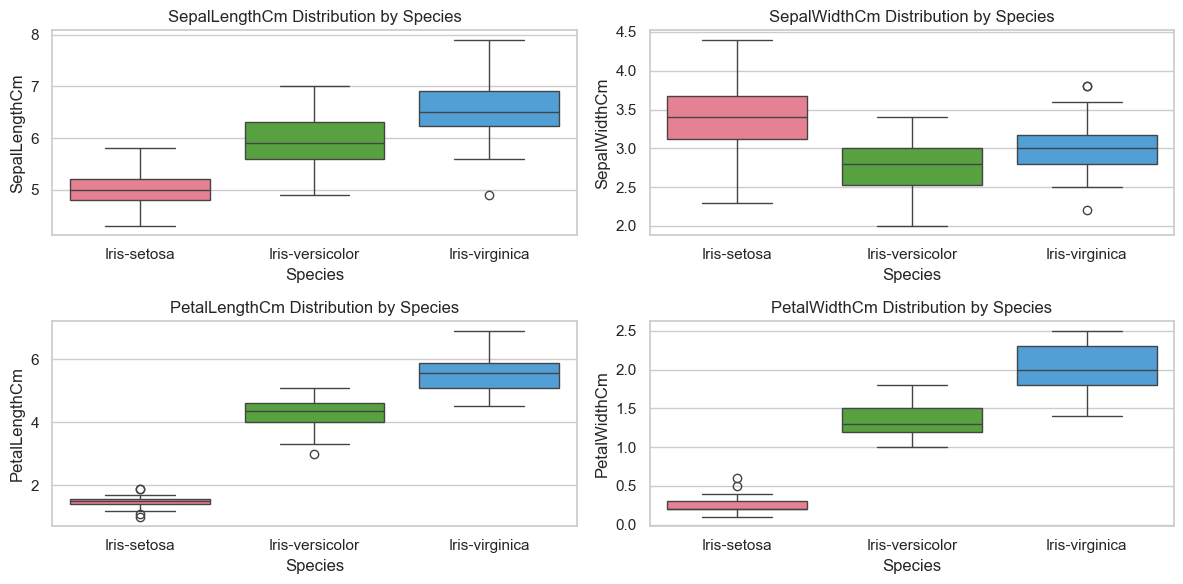

In [13]:
# 4. Boxplots to check for outliers
plt.figure(figsize=(12, 6))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Species', y=column, data=df, palette='husl')
    plt.title(f'{column} Distribution by Species')
plt.tight_layout()
plt.show()

In [14]:
# Separate Features (X) and Target (y)
X = df.drop('Species', axis=1)
y = df['Species']

# Split the dataset into Training and Testing sets (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (Standardization)
# This is important for many machine learning algorithms to perform well
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (120, 4)
Testing set shape: (30, 4)


In [15]:
# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42, multi_class='auto', solver='lbfgs')

# Train the model
model.fit(X_train_scaled, y_train)

print("Model training completed.")

Model training completed.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model Accuracy: 100.00%

Confusion Matrix:


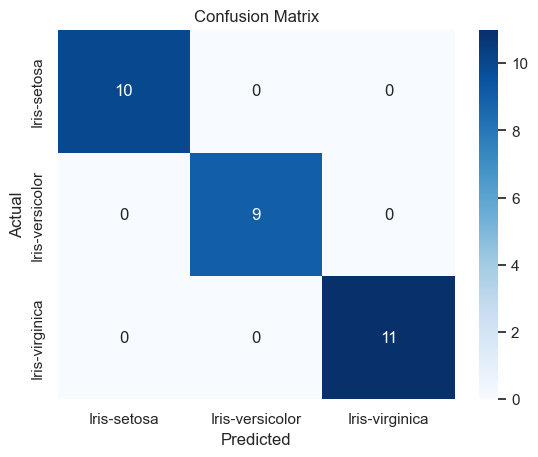

In [17]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%\n")

# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [19]:
# Example new data: [SepalLength, SepalWidth, PetalLength, PetalWidth]
new_data = np.array([[5.1, 3.5, 1.4, 0.2]]) 

# Scale the new data using the same scaler fitted on training data
new_data_scaled = scaler.transform(new_data)

# Predict
prediction = model.predict(new_data_scaled)
print(f"Prediction for input {new_data[0]}: {prediction[0]}")

Prediction for input [5.1 3.5 1.4 0.2]: Iris-setosa


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
